In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)


num_rows = 100
num_columns = 3


random_data = pd.DataFrame(np.random.rand(num_rows, num_columns), 
                            columns=[f'Column_{i+1}' for i in range(num_columns)])



rd = random_data.copy() 

x = 'Column_1'
y = 'Column_2'
z = 'Column_3'

rd.loc[:, z] = rd[z].round()

condition = rd[z] == 1
rd.loc[condition, x] = rd.loc[condition, x] ** np.sin(rd[x])
rd.loc[~condition, x] = rd.loc[~condition, x] - np.log(rd[x])

rd.loc[condition, y] = rd.loc[condition, y] ** np.sin(rd[y])  
rd.loc[~condition, y] = rd.loc[~condition, y] - np.log(rd[y])

training_samples = num_rows // 2


x_train = rd[x][:training_samples]
y_train = rd[y][:training_samples]
z_train = rd[z][:training_samples]
training_data = rd[:training_samples]

x_test = rd[x][training_samples:]
y_test = rd[y][training_samples:]
z_test = rd[z][training_samples:]

print(f"First 5 rows of Dataframe: \n{rd.head()}")


print(f"\nFirst 5 indices of Training Data: \n{training_data.head()}")

First 5 rows of Dataframe: 
   Column_1  Column_2  Column_3
0  0.731247  0.802666       1.0
1  0.729997  0.702533       1.0
2  0.704530  0.914721       1.0
3  0.698644  0.846894       1.0
4  1.133600  1.002913       0.0

First 5 indices of Training Data: 
   Column_1  Column_2  Column_3
0  0.731247  0.802666       1.0
1  0.729997  0.702533       1.0
2  0.704530  0.914721       1.0
3  0.698644  0.846894       1.0
4  1.133600  1.002913       0.0


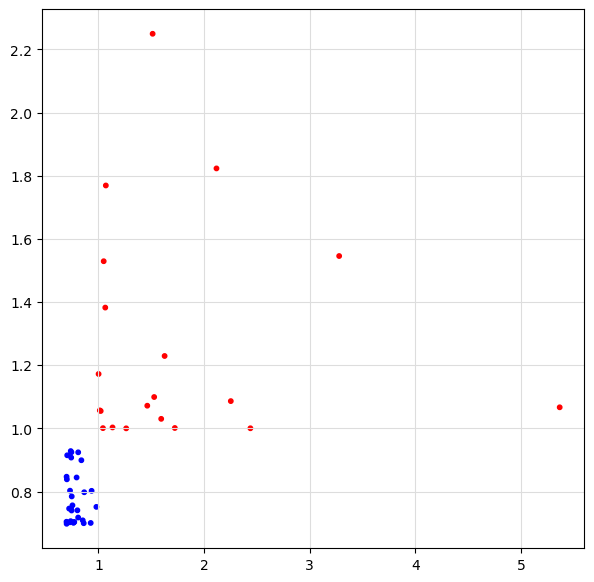

In [2]:
size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(z_train == threshold, 'blue', 'red')
plt.scatter(x_train, y_train, c=colors, s=size)

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

X Standardized is: 
0   -0.538523
1   -0.540095
2   -0.572128
3   -0.579531
4   -0.032451
Name: Column_1, dtype: float64

Y Standardized is: 
0   -0.174405
1   -0.277399
2   -0.059150
3   -0.128915
4    0.031562
Name: Column_2, dtype: float64

First 5 rows of Dataframe: 
   Column_1  Column_2  Column_3  x_z_train  y_z_train
0  0.731247  0.802666       1.0  -0.538523  -0.174405
1  0.729997  0.702533       1.0  -0.540095  -0.277399
2  0.704530  0.914721       1.0  -0.572128  -0.059150
3  0.698644  0.846894       1.0  -0.579531  -0.128915
4  1.133600  1.002913       0.0  -0.032451   0.031562

First 5 indices of Class 1: 
   x_z_train  y_z_train
0  -0.538523  -0.174405
1  -0.540095  -0.277399
2  -0.572128  -0.059150
3  -0.579531  -0.128915
5  -0.441136  -0.049441

First 5 indices of Class 2: 
    x_z_train  y_z_train
4   -0.032451   0.031562
8    1.375538   0.117363
9   -0.198491   0.205711
10   0.546958   0.059540
13  -0.118975   0.422019


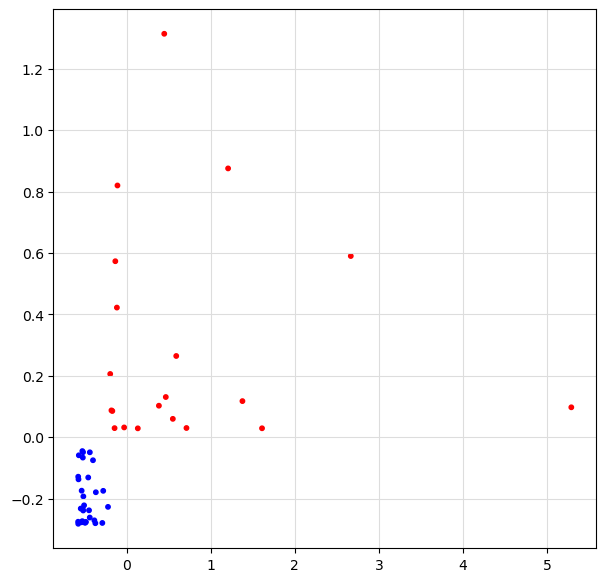

In [3]:
def standardize(x, y):
    u_x, u_y = np.mean(x), np.mean(y)
    std_x, std_y = np.std(x), np.mean(y)
    x_z = (x - u_x) / std_x
    y_z = (y - u_y) / std_y
    return x_z, y_z

x_z_train, y_z_train = standardize(x_train, y_train)

rd['x_z_train'] = x_z_train
rd['y_z_train'] = y_z_train
print(f'X Standardized is: \n{x_z_train.head()}\n\nY Standardized is: \n{y_z_train.head()}')
print(f'\nFirst 5 rows of Dataframe: \n{rd.head()}')

class_1 = pd.DataFrame({'x_z_train': x_z_train.loc[z_train.eq(1)], 'y_z_train': y_z_train.loc[z_train.eq(1)]})
class_2 = pd.DataFrame({'x_z_train': x_z_train.loc[z_train.eq(0)], 'y_z_train': y_z_train.loc[z_train.eq(0)]})
all_classes = [class_2, class_1]
classes_names = ['Class 2', 'Class 1']
class_values = [0, 1]
num_features = num_columns - 1

print(f"\nFirst 5 indices of Class 1: \n{class_1.head()}")
print(f"\nFirst 5 indices of Class 2: \n{class_2.head()}")

size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(z_train == threshold, 'blue', 'red')
plt.scatter(x_z_train, y_z_train, c=colors, s=size)

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [4]:
def prior_prob(classes_strings, all_classes, samples, dataset):
    n_k = []
    p_a = []
    n = samples
    for index, value in enumerate(all_classes):
        n_k.append(len(value))
        p_a.append(n_k[index] / n)
        print(f"The Prior Probability for {classes_names[index]} is: {p_a[index]*100}%")
    return p_a, n_k
    
prior_probabilities, length_of_classes = prior_prob(classes_names, all_classes, training_samples, rd)

The Prior Probability for Class 2 is: 40.0%
The Prior Probability for Class 1 is: 60.0%


In [5]:
def sample_mean(all_classes, num_class_samples, classes_strings, dataset):

    xk_sample_means, yk_sample_means = [], []
    
    for index, value in enumerate(all_classes):
        
        n_k = num_class_samples[index]
        xk_sample_means.append((1 / n_k) * np.sum(x_z_train[z_train == index]))
        yk_sample_means.append((1 / n_k) * np.sum(y_z_train[z_train == index]))
        print(f"\nThe Sample Mean for {classes_strings[index]}'s X-Value is: {xk_sample_means[index]}")
        print(f"\nThe Sample Mean for {classes_strings[index]}'s Y-Value is: {yk_sample_means[index]}")

    sample_means = np.zeros(num_features, dtype=float)
    
    k_sample_means = [xk_sample_means, yk_sample_means]

    sample_means = np.add(sample_means, k_sample_means)
    
    print(f'\n{sample_means}')
    
    return sample_means

sample_means = sample_mean(all_classes, length_of_classes, classes_names, rd)


The Sample Mean for Class 2's X-Value is: 0.7152414963256627

The Sample Mean for Class 2's Y-Value is: 0.2945746620382701

The Sample Mean for Class 1's X-Value is: -0.4768276642171085

The Sample Mean for Class 1's Y-Value is: -0.19638310802551337

[[ 0.7152415  -0.47682766]
 [ 0.29457466 -0.19638311]]


In [6]:
def find_W_matrix(all_classes):
    W = np.zeros((num_features, num_features), dtype=float)
    for class_values in all_classes:
        cov_matrix = np.cov(class_values[['x_z_train', 'y_z_train']], rowvar=False)
        W += cov_matrix
    return W
W = find_W_matrix(all_classes)
print(W)

[[ 1.72943974 -0.01508668]
 [-0.01508668  0.13711832]]


In [7]:
def find_B_matrix(W, training_set, all_classes, dataset):
    training_set = training_set.to_numpy()
    B = np.zeros((num_features, num_features), dtype=float)
    T = np.cov(training_set[:, :2], rowvar=False)
    B = T - W
    print(f'{B} \n\n{T}')
    return B, T
B, T = find_B_matrix(W, training_data, all_classes, rd)

[[-1.08443483  0.12118195]
 [ 0.12118195 -0.02968499]] 

[[0.64500492 0.10609527]
 [0.10609527 0.10743334]]


In [8]:
def find_S(W, B):
    W_inv = np.linalg.inv(W + np.eye(W.shape[0]) * 1e-6)
    S = np.dot(W_inv, B)
    print(S)
    return S
S = find_S(W, B)

[[-0.61992914  0.06824699]
 [ 0.81556179 -0.20898125]]


In [9]:
eigenvalues, eigenvectors = np.linalg.eig(S)
eigenvectors = eigenvectors.T

indices = np.argsort(abs(eigenvalues))[::-1]

print('\nEigenvalues:', eigenvalues)
print('\nEigenvectors:\n', eigenvectors)

eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[indices]

print('\nSorted Eigenvalues:', eigenvalues)
print('\nSorted Eigenvectors:\n', eigenvectors)

first_evector = eigenvectors[:, 0]

print(f'\nFirst Eigenvector to be used as weights: {first_evector}')


Eigenvalues: [-0.72731167 -0.10159871]

Eigenvectors:
 [[-0.53638674  0.84397232]
 [-0.13054028 -0.99144301]]

Sorted Eigenvalues: [-0.72731167 -0.10159871]

Sorted Eigenvectors:
 [[-0.53638674  0.84397232]
 [-0.13054028 -0.99144301]]

First Eigenvector to be used as weights: [-0.53638674 -0.13054028]


In [10]:
scores = [[], [], []]
for index, value in enumerate(all_classes):
    scores[index].append((x_z_train[z_train==index] * first_evector[0]) + y_z_train[z_train==index] * first_evector[1])
    scores[-1].append((x_z_train * first_evector[0]) + (y_z_train * first_evector[1]))

var_scores = [[], []]

for index, value in enumerate(all_classes):
    var_scores[index].append(np.var(scores[index]))


total_var_scores = np.var(scores[-1]) / len(all_classes)


norm_weights = first_evector / (np.sqrt(total_var_scores))

new_scores = []
for index, value in enumerate(all_classes):
    new_scores.append((x_z_train * norm_weights[0]) + (y_z_train * norm_weights[1]))

new_var_score = np.var(new_scores[-1]) / len(all_classes)

print(f'\nThe Total Variance of the Scores is: {total_var_scores}')
print(f'\nThe Normalized Weights are: {norm_weights}')
print(f'\nThe Updated Variance of the Scores is: {new_var_score}')
print(f'\nThe Updated Scores are \n{new_scores}')


The Total Variance of the Scores is: 0.15422291520106046

The Normalized Weights are: [-1.36585179 -0.33240694]

The Updated Variance of the Scores is: 0.9999999999999999

The Updated Scores are 
[0     0.793516
1     0.829900
2     0.801104
3     0.834406
4     0.033832
5     0.618961
6     0.576215
7     0.618974
8    -1.917793
9     0.202730
10   -0.766855
11    0.739385
12    0.769897
13    0.022220
14    0.672303
15   -0.119187
16    0.884570
17   -0.187094
18    0.827534
19   -0.890324
20    0.771950
21   -1.936689
22    0.564440
23   -2.206981
24    0.382514
25   -3.836733
26   -1.044325
27    0.832569
28    0.816343
29    0.694897
30   -0.554713
31   -0.002437
32    0.729443
33   -7.258746
34    0.190541
35    0.796817
36   -0.978636
37    0.222281
38    0.606016
39    0.738582
40    0.690591
41    0.764934
42    0.492286
43   -0.676123
44    0.773114
45    0.789748
46    0.758294
47    0.884415
48    0.208382
49    0.442932
dtype: float64, 0     0.793516
1     0.829900
2     

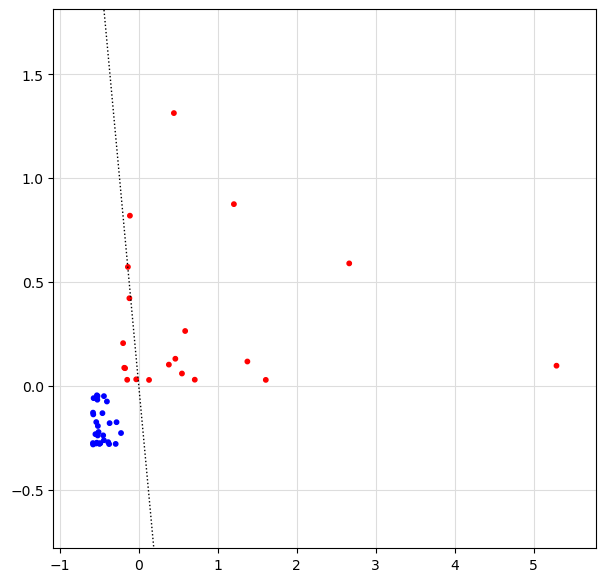

In [11]:
def decision_boundary(x):
    return -(norm_weights[0] / norm_weights[1]) * x

x_range = np.linspace(min(x_z_train), max(x_z_train))
y_range = decision_boundary(x_range)



size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(z_train == threshold, 'blue', 'red')

plt.plot(x_range, y_range, 'black', linewidth=1, linestyle =':', label='Decision Boundary')
plt.scatter(x_z_train, y_z_train, c=colors, s=size)

plt.xlim([x_z_train.min() - 0.5, x_z_train.max() + 0.5])
plt.ylim([y_z_train.min() - 0.5, y_z_train.max() + 0.5])

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [12]:
features = np.column_stack((x_z_train, y_z_train))

projections = features.dot(norm_weights)

mean_class_2 = projections[z_train == 0].mean()
mean_class_1 = projections[z_train == 1].mean()

threshold = (mean_class_2 + mean_class_1) / 2

predictions = np.where(projections > threshold, 1, 0)

accuracy = np.mean(predictions == z_train)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 84.00%


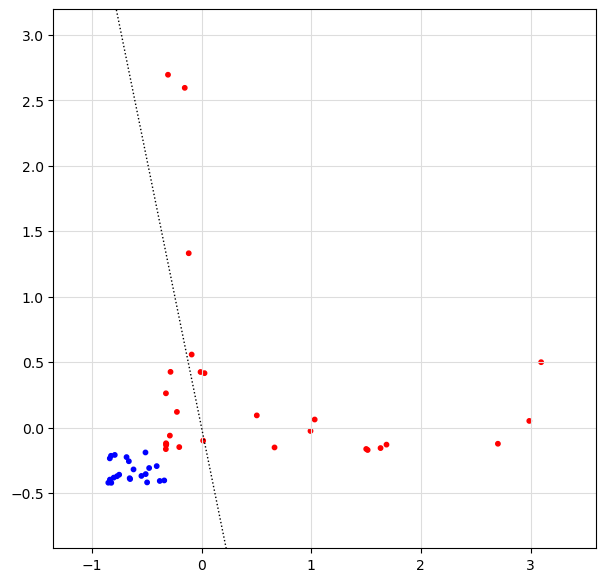

In [13]:
x_z_test, y_z_test = standardize(x_test, y_test)

rd['x_z_test'] = x_z_test
rd['y_z_test'] = y_z_test


x_range = np.linspace(min(x_z_test), max(x_z_test))
y_range = decision_boundary(x_range)


size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(z_test == threshold, 'blue', 'red')

plt.plot(x_range, y_range, 'black', linewidth=1, linestyle =':', label='Decision Boundary')
plt.scatter(x_z_test, y_z_test, c=colors, s=size)

plt.xlim([x_z_test.min() - 0.5, x_z_test.max() + 0.5])
plt.ylim([y_z_test.min() - 0.5, y_z_test.max() + 0.5])

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [14]:
features = np.column_stack((x_z_test, y_z_test))

projections = features.dot(norm_weights)

mean_class_2 = projections[z_test == 0].mean()
mean_class_1 = projections[z_test == 1].mean()

threshold = (mean_class_2 + mean_class_1) / 2

predictions = np.where(projections > threshold, 1, 0)

accuracy = np.mean(predictions == z_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 82.00%
